# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
df=pd.read_csv('test.csv')

In [4]:

# Checking data
df.head(10)
    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# Copying the data
df_copy=df.copy()

# Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.shape

(418, 11)

In [9]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

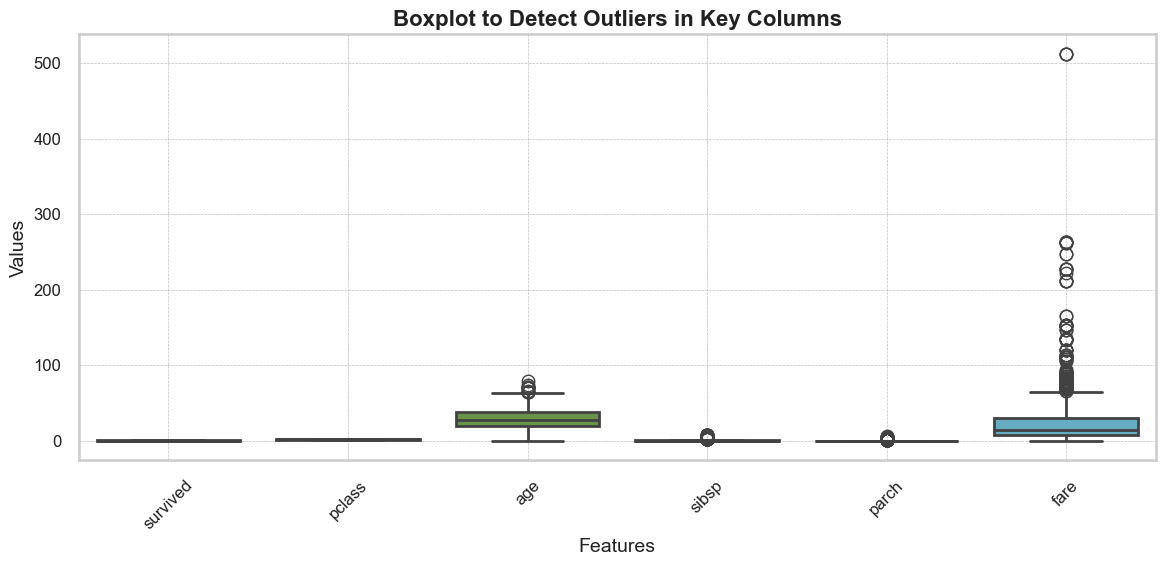

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from seaborn (includes all required columns)
df = sns.load_dataset('titanic')

# Set style and context for a professional look
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']],
    palette=["#5C9BD1", "#D19A5C", "#67A03C", "#8E6FD2", "#DB4D6D", "#56B4D3"],  # Professional color scheme
    linewidth=2  # Set boxplot line thickness for clarity
)

# Add titles and labels
plt.title("Boxplot to Detect Outliers in Key Columns", fontsize=16, fontweight="bold", color="#212121")
plt.xlabel("Features", fontsize=14, color="#212121")
plt.ylabel("Values", fontsize=14, color="#212121")

# Customize the ticks
plt.xticks(rotation=45, fontsize=12, color="#212121")  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12, color="#212121")

# Add a grid for readability
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
df = sns.load_dataset('titanic')

# IQR Interquartile Range for 'age' column (notice lowercase)
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR = Q3_age - Q1_age

print("Q1:", Q1_age)
print("Q3:", Q3_age)
print("IQR:", IQR)


Q1: 20.125
Q3: 38.0
IQR: 17.875


In [14]:
lower_fence = Q1_age - 1.5 * IQR  # Calculate the lower fence for age
upper_fence = Q3_age + 1.5 * IQR  # Calculate the upper fence for age

print(f"Lower Fence :{lower_fence}, Upper Fence :{upper_fence}")

Lower Fence :-6.6875, Upper Fence :64.8125


In [17]:
df_filtered_age = df[(df['age'] > 0) & (df['age'] <= upper_fence)]

In [18]:
df_filtered_age.shape

(703, 15)

In [21]:
df_filtered = df_filtered_age[(df_filtered_age['fare'] > 0) & (df_filtered_age['fare'] <= upper_fence)]


In [22]:
df_filtered.describe()

,survived,pclass,age,sibsp,parch,fare
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.358586,2.447811,28.162879,0.500000,0.405724,18.671338
std,0.479989,0.724053,13.486713,0.966993,0.854727,13.339052
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,26.250000
max,1.000000,3.000000,64.000000,5.000000,6.000000,63.358300


# Data Exploratory Analysis :

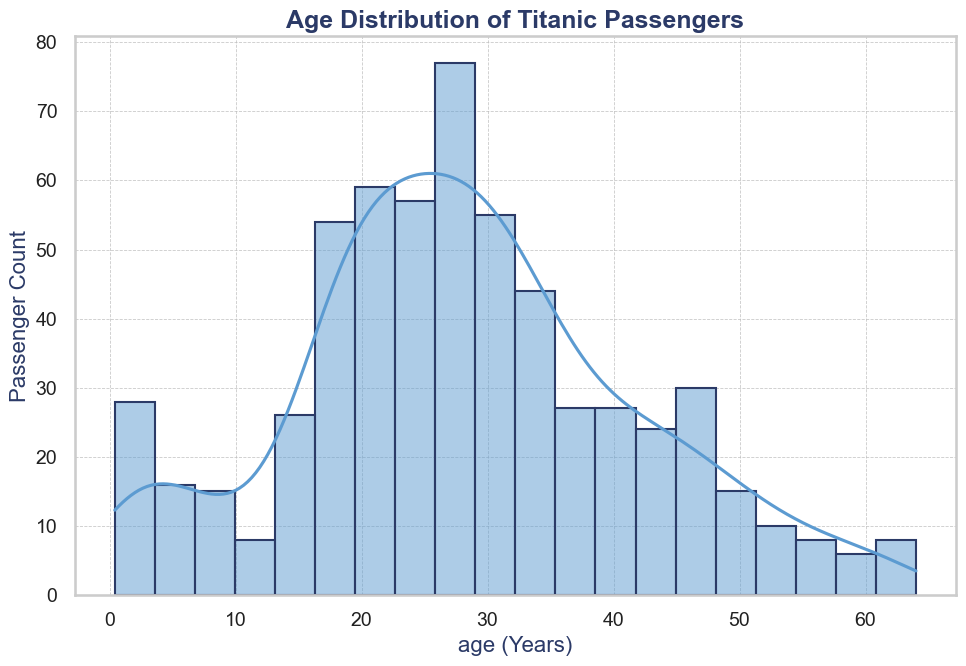

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style and context for presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Figure size is adjusted for better readability in presentations
plt.figure(figsize=(10, 7))

# Creating a histogram with KDE (Kernel Density Estimate)
sns.histplot(
    df_filtered['age'],  # Input data
    bins=20,  # Number of bins for the histogram
    kde=True,  # Adds a smooth density line
    color="#5C9BD1",  # Primary bar color (light blue)
    edgecolor="#2B3A67"  # Edge color for bars (dark blue)
)

# Adding a clear and professional title
plt.title(
    "Age Distribution of Titanic Passengers",
    fontsize=18, fontweight='bold', color="#2B3A67"
)

# Labeling axes with appropriate font sizes and colors
plt.xlabel("age (Years)", fontsize=16, color="#2B3A67")
plt.ylabel("Passenger Count", fontsize=16, color="#2B3A67")

# Enhancing tick readability with larger fonts and consistent colors
plt.xticks(fontsize=14, color="#212121")
plt.yticks(fontsize=14, color="#212121")

# Adding a light grid to enhance visual appeal and readability
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.6, alpha=0.8)

# Adjusting layout for better alignment and spacing
plt.tight_layout()

# Displaying the plot
plt.show()
     

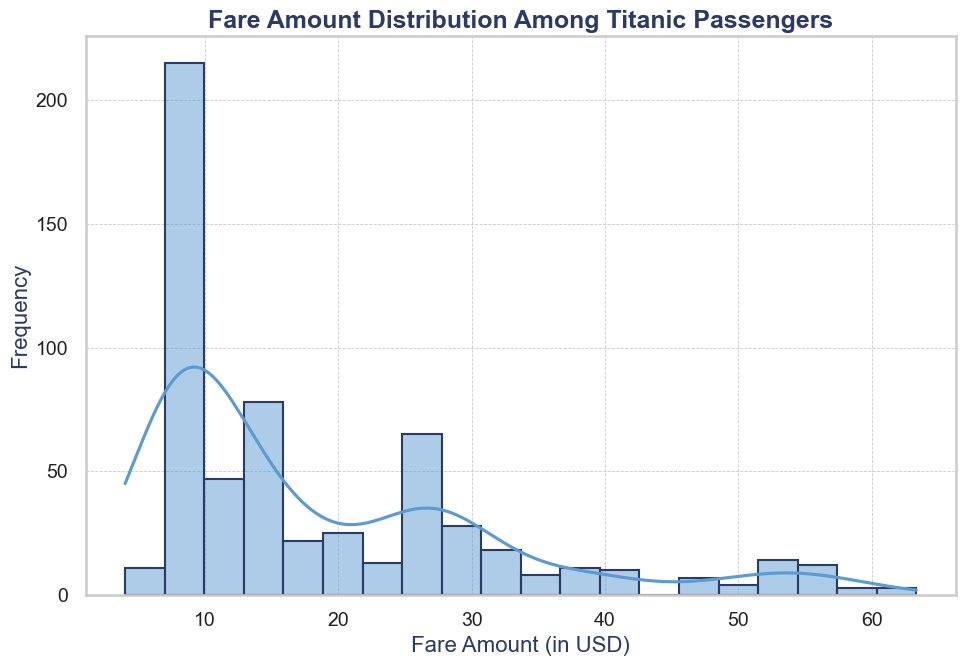

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style and context for a presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Adjusting figure size for better clarity during presentations
plt.figure(figsize=(10, 7))

# Creating the histogram with KDE
sns.histplot(
    df_filtered['fare'],  # Data column for Fare
    bins=20,  # Number of bins for the histogram
    kde=True,  # Adds a density line
    color="#5C9BD1",  # Bar color (light blue)
    edgecolor="#2B3A67"  # Bar edge color (dark blue)
)

# Adding a title with improved readability
plt.title(
    "Fare Amount Distribution Among Titanic Passengers",
    fontsize=18, fontweight='bold', color="#2B3A67"
)

# Labeling the axes with clear font sizes and consistent colors
plt.xlabel("Fare Amount (in USD)", fontsize=16, color="#2B3A67")
plt.ylabel("Frequency", fontsize=16, color="#2B3A67")

# Enhancing the tick labels for better readability
plt.xticks(fontsize=14, color="#212121")
plt.yticks(fontsize=14, color="#212121")

# Adding a subtle grid for visual guidance
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.6, alpha=0.8)

# Adjusting layout for a polished presentation appearance
plt.tight_layout()

# Displaying the plot
plt.show()

     

In [35]:
print(df.columns.tolist())


['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [38]:
numerical_column = df_filtered.select_dtypes(include=['int64', 'float64']).columns
numerical_column

Index(['survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [39]:
correlation_matrix = df_filtered[numerical_column].corr() # Calculate the correlation matrix for the numerical columns within the DataFrame
print(correlation_matrix) # Print the correlation matrix

          survived       age     sibsp     parch      fare
survived  1.000000 -0.118773 -0.034515  0.088706  0.221850
age      -0.118773  1.000000 -0.361133 -0.219167  0.081937
sibsp    -0.034515 -0.361133  1.000000  0.400920  0.388643
parch     0.088706 -0.219167  0.400920  1.000000  0.335931
fare      0.221850  0.081937  0.388643  0.335931  1.000000


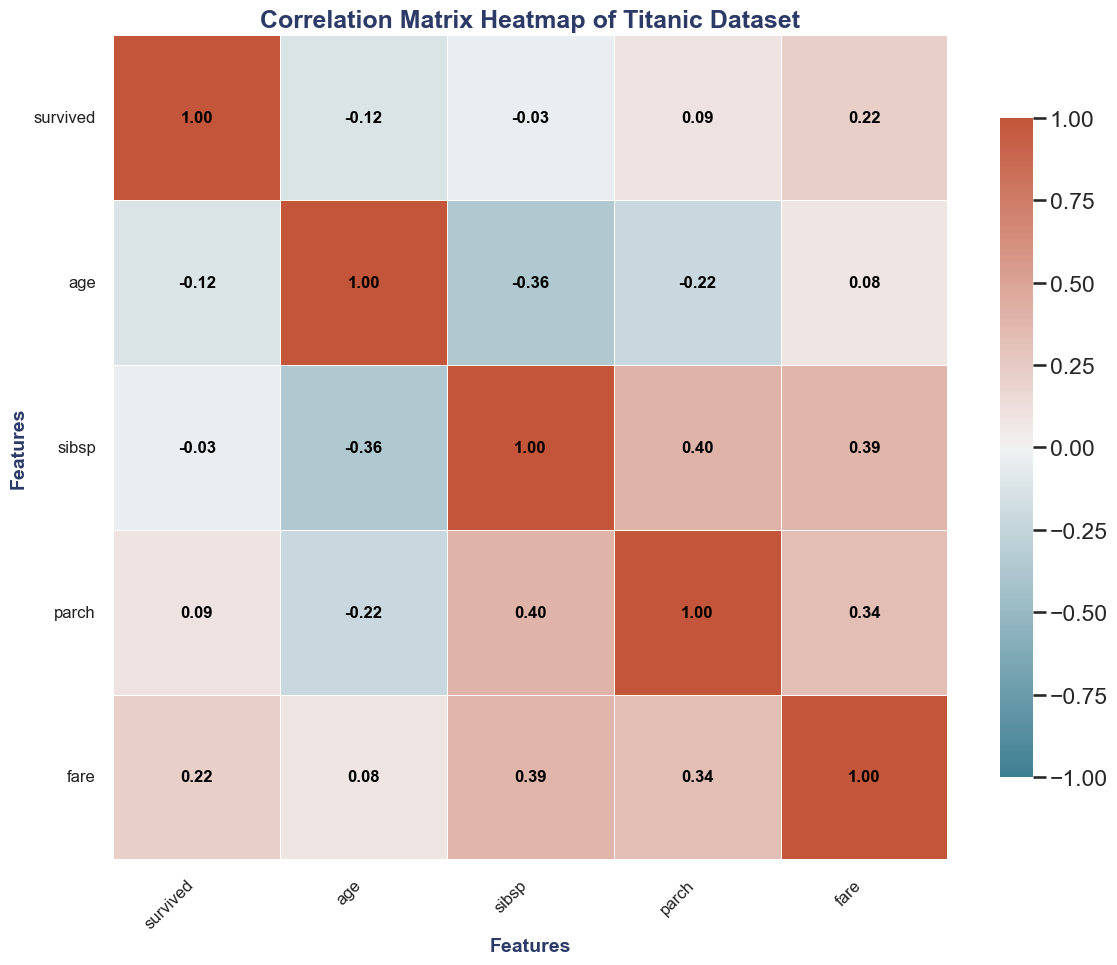

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style and context for presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Define a visually appealing color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap with adjustments for clarity and presentation
plt.figure(figsize=(12, 10))  # Increased figure size for better visibility
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",  # Format numbers to two decimal places
    cmap=cmap,  # Color map for divergent data
    vmin=-1, vmax=1,  # Correlation values range
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    linewidths=0.7,  # Gridline thickness for distinction
    annot_kws={"size": 12, "fontweight": "bold", "color": "black"}  # Annotation style
)

# Adding a descriptive title and styling axis labels
plt.title(
    "Correlation Matrix Heatmap of Titanic Dataset",
    fontsize=18, fontweight="bold", color="#2B3A67"
)
plt.xlabel("Features", fontsize=14, fontweight="bold", color="#2B3A67")
plt.ylabel("Features", fontsize=14, fontweight="bold", color="#2B3A67")

# Customizing ticks for better readability
plt.xticks(fontsize=12, rotation=45, ha="right", color="#212121")
plt.yticks(fontsize=12, rotation=0, color="#212121")

# Tight layout for a polished appearance
plt.tight_layout()

# Display the heatmap
plt.show()

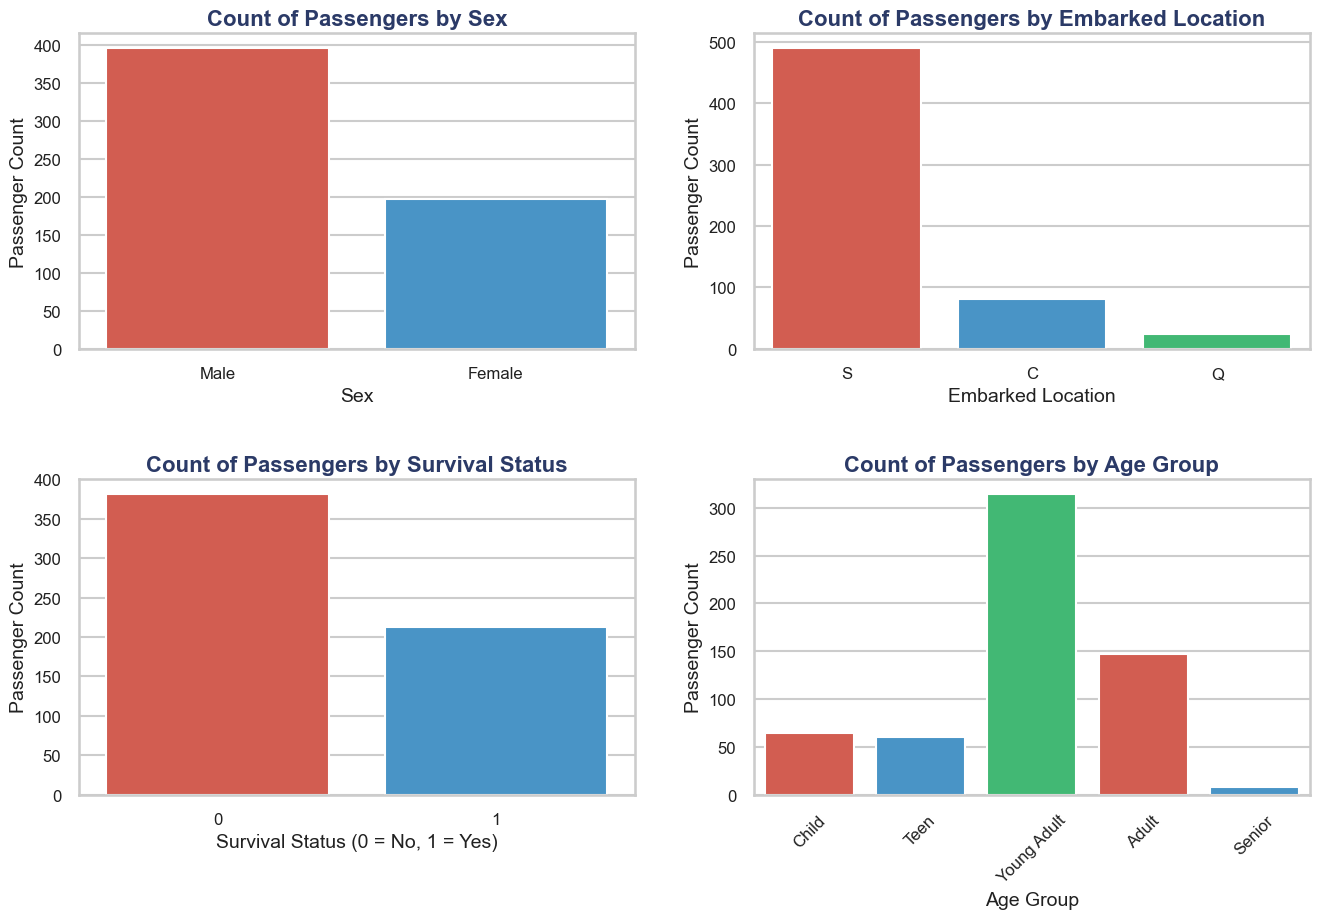

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with Red, Blue, and Green
palette = ['#e74c3c', '#3498db', '#2ecc71']  # Red, Blue, Green

# Create subplots for better visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Slightly larger for better clarity

# Plot 1: Countplot of 'Sex'
sns.countplot(x='sex', data=df_filtered, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Count of Passengers by Sex', fontsize=16, fontweight='bold', color="#2B3A67")
axes[0, 0].set_xlabel("Sex", fontsize=14, color="#212121")
axes[0, 0].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[0, 0].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[0, 0].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 2: Countplot of 'Embarked'
sns.countplot(x='embarked', data=df_filtered, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Count of Passengers by Embarked Location', fontsize=16, fontweight='bold', color="#2B3A67")
axes[0, 1].set_xlabel("Embarked Location", fontsize=14, color="#212121")
axes[0, 1].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[0, 1].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[0, 1].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 3: Countplot of 'Survived'
sns.countplot(x='survived', data=df_filtered, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Count of Passengers by Survival Status', fontsize=16, fontweight='bold', color="#2B3A67")
axes[1, 0].set_xlabel("Survival Status (0 = No, 1 = Yes)", fontsize=14, color="#212121")
axes[1, 0].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[1, 0].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[1, 0].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 4: Countplot of 'age_group'
sns.countplot(x='age_group', data=df_filtered, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Count of Passengers by Age Group', fontsize=16, fontweight='bold', color="#2B3A67")
axes[1, 1].set_xlabel("Age Group", fontsize=14, color="#212121")
axes[1, 1].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[1, 1].tick_params(axis='x', labelsize=12, labelcolor="#212121", rotation=45)
axes[1, 1].tick_params(axis='y', labelsize=12, labelcolor="#212121")


# Adjust layout for a clean and balanced appearance
plt.tight_layout(pad=2.0)

# Show the subplots
plt.show()

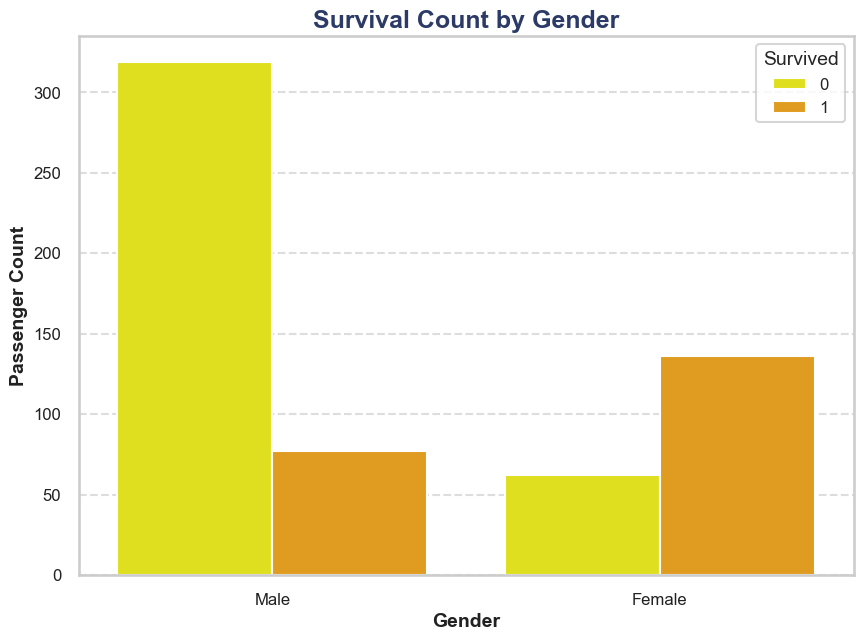

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 7))

# Plotting the countplot with a custom color palette
sns.countplot(
    x='sex', hue='survived', data=df_filtered,
    palette=["yellow", "orange"] # Yellow and Orange
)

# Add title and axis labels with professional styling
plt.title('Survival Count by Gender', fontsize=18, fontweight='bold', color="#2B3A67")
plt.xlabel('Gender', fontsize=14, fontweight='bold', color="#212121")
plt.ylabel('Passenger Count', fontsize=14, fontweight='bold', color="#212121")

# Customize tick labels
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")

# Add a legend with custom title
plt.legend(title='Survived', fontsize=12, title_fontsize=14, loc='upper right')

# Add a horizontal grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5, color="#BDBDBD")

# Adjust layout for a p


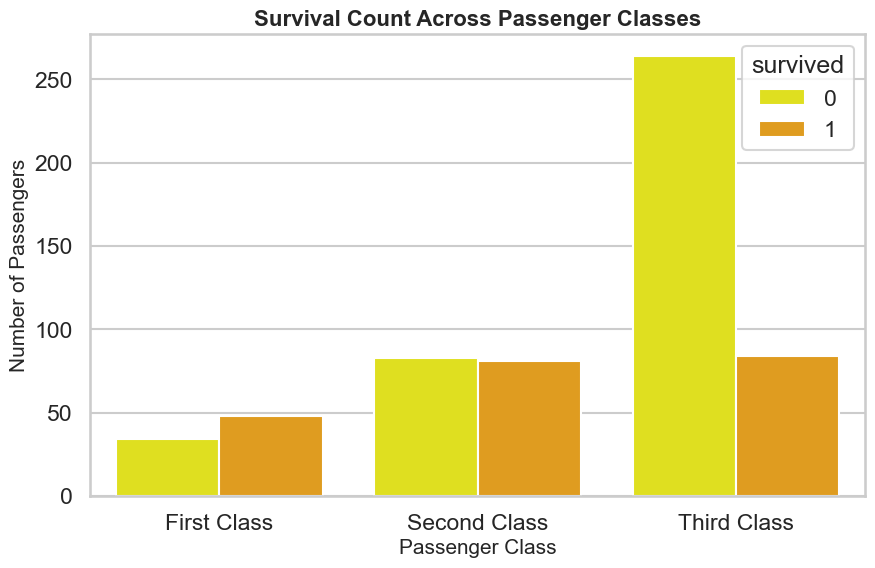

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=df_filtered, palette=["yellow", "orange"], order=['First Class', 'Second Class', 'Third Class'])
plt.title('Survival Count Across Passenger Classes', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.show()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


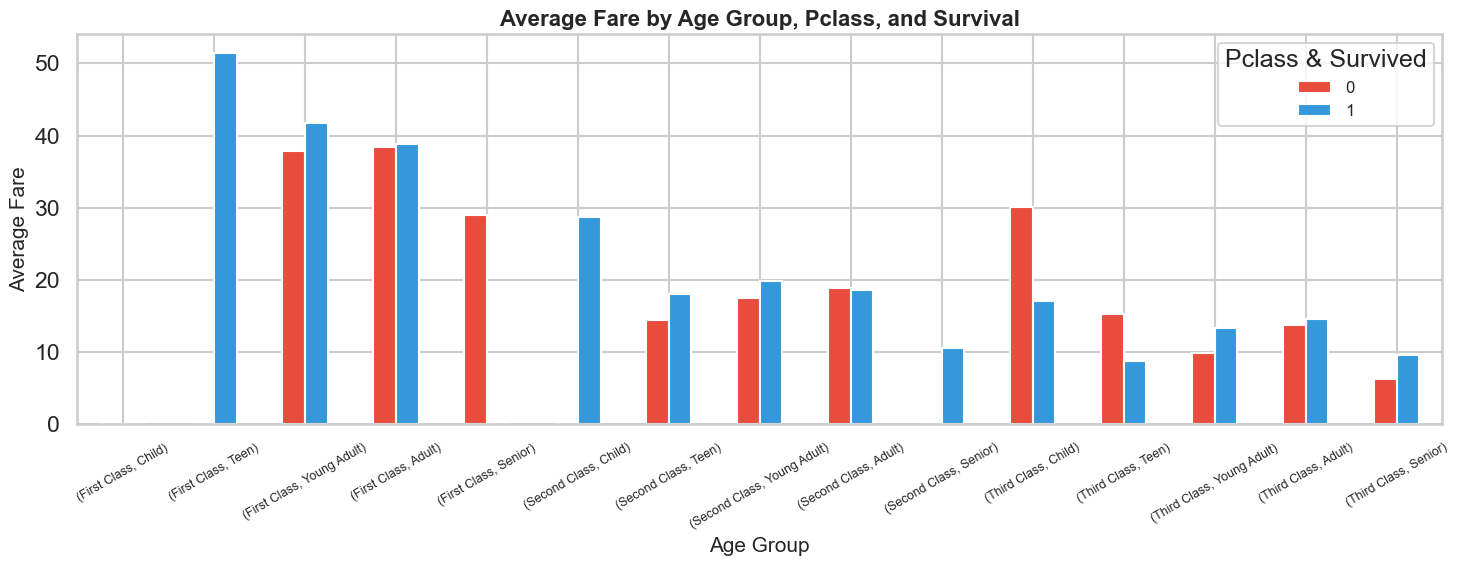

In [62]:
# Are higher fares indicative of better access to lifeboats and evacuation resources?

import matplotlib.pyplot as plt

# Group the data by Pclass, Age_Group, and Survived, and calculate the mean Fare
df_grouped = df_filtered.groupby(['pclass', 'age_group', 'survived'])['fare'].mean().unstack()

# Define a new color palette with distinct colors (similar to the previous request)
color_palette = ['#e74c3c','#3498db']  # Red, Blue

# Plot the bar chart with the new color palette
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot
plt.title('Average Fare by Age Group, Pclass, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Average Fare', fontsize=15)
plt.xticks(rotation=30, fontsize=9)
plt.legend(title='Pclass & Survived', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()